In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

import seaborn as sns; sns.set()

In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [ ]:
dataset_train.head()

In [ ]:
print("shape: ")
print(dataset_train.shape)
print("columns:") 
print(dataset_train.columns)

In [10]:
CorrelationMatrix = dataset_train.corr()
CorrelationMatrix["SalePrice"].sort_values(ascending=False)


SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
log1stFlrSF       0.591264
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
GarageYrBlt       0.486362
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.351799
logTotalBsmtSF    0.326047
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
M

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrix, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns);
#Apply yticks
plt.yticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns)
#show plot
plt.show()

Feature extraction:

From the plot we can see that the most prominent features are (Setting the cutoff points as 0.5 correlation)


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101


Now we inspect these features seperately 

For categorical values, we plot the boxplots; for Quantitative values, we plot the scatterplots


In [ ]:
# OverallQual
feature = 'OverallQual'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


In [ ]:
# GrLivArea

feature = 'GrLivArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))


In [ ]:
# GarageCars
feature = 'GarageCars'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
plot = sns.boxplot(x=feature, y="SalePrice", data=data)


In [ ]:
# GarageArea

feature = 'GarageArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# TotalBsmtSF

feature = 'TotalBsmtSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# 1stFlrSF

feature = '1stFlrSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# FullBath
feature = 'FullBath'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# TotRmsAbvGrd
feature = 'TotRmsAbvGrd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# YearBuilt
feature = 'YearBuilt'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(50, 15))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# YearRemodAdd
feature = 'YearRemodAdd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(30, 10))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


By reinspecting the heatmap plot, we notice that some features are correlated, i.e. we look at the top 12 most significant features

In [ ]:
features = CorrelationMatrix.nlargest(12, "SalePrice")["SalePrice"].index
CorrelationMatrices = np.corrcoef(dataset_train[features].values.T)

fig, ax = plt.subplots(figsize=(12, 12))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrices, cmap=colormap, annot=True, fmt=".2f", yticklabels=features.values, xticklabels=features.values)


From this refined plot, we can see that 

OverallQual correlates with GrLivArea, GarageCars, YearBuilt;
GrLivArea correlates with 1stFlrSF, FullBath and TotRmsAbvGrd
YearBuilt correlates with YearRemodAdd

SalePrice
GrLivArea
GarageCars
1stFlrSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd

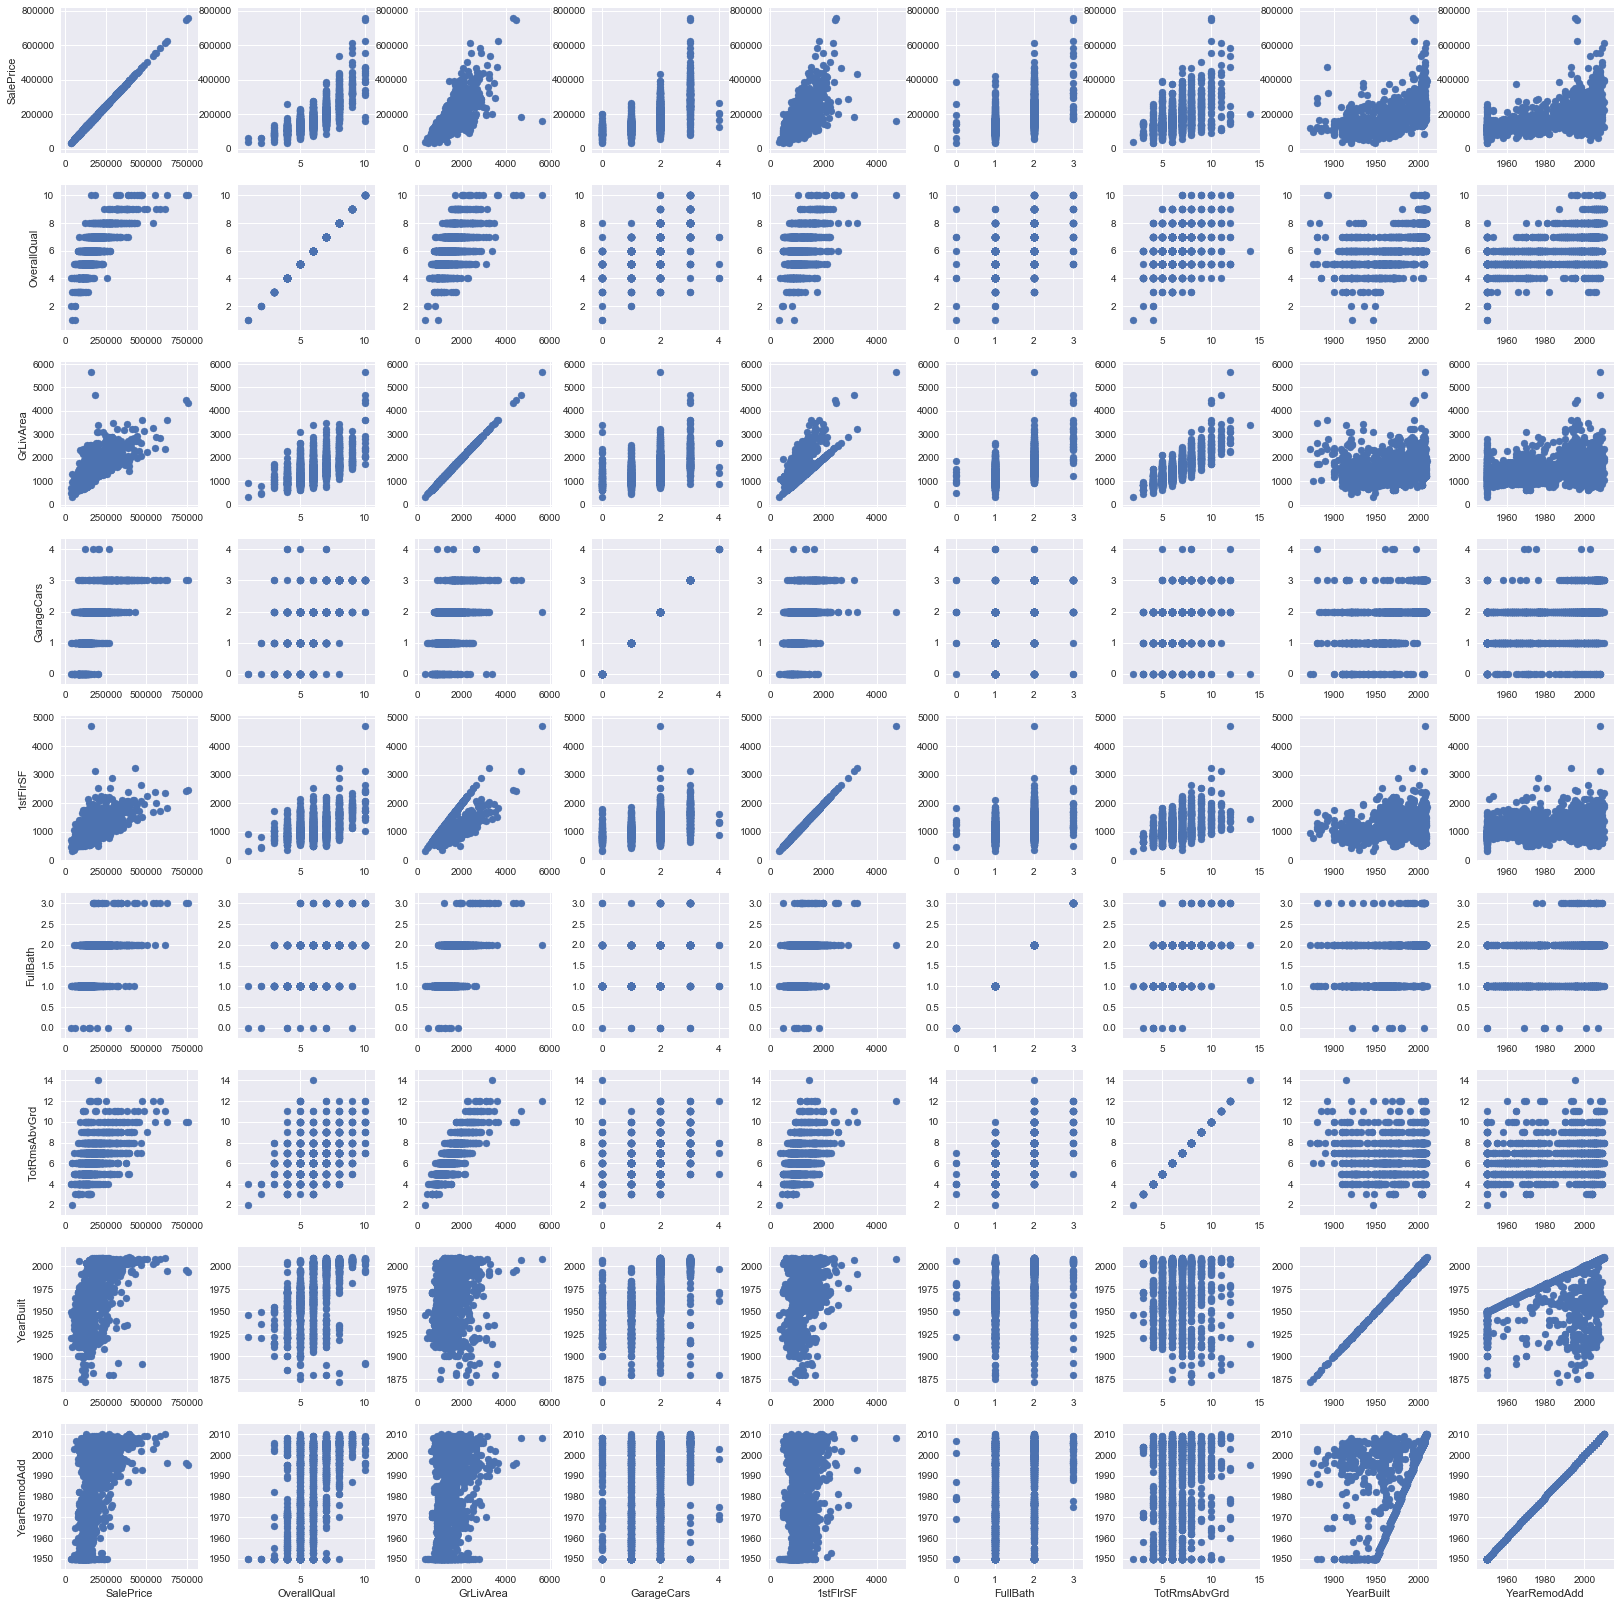

In [9]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd' ]

plot = sns.PairGrid(dataset_train[cols])

plot = plot.map(plt.scatter)


In [ ]:
dataset_train.isnull().sum().sort_values(ascending=False)

    it loosk like all the our selected features do not suffer from missing value concerns 
    now inspect the Dependend variable, SalePrice

In [ ]:
dataset_train['SalePrice'].describe()


In [ ]:
print("Skewness: %f" % dataset_train['SalePrice'].skew())
print("Kurtosis: %f" % dataset_train['SalePrice'].kurt())

In [ ]:
sns.distplot(dataset_train['SalePrice'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['SalePrice'], plot=plt)


It doesn't look normal, we need to do somet transformation

In [ ]:
dataset_train['logSalePrice'] = np.log(dataset_train['SalePrice'])


In [ ]:
sns.distplot(dataset_train['logSalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['logSalePrice'], plot=plt)

Looks better now
Let's inspect the rest of the quantitative variables
    GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF

In [ ]:
sns.distplot(dataset_train['GrLivArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GrLivArea'], plot=plt)


In [ ]:
dataset_train['logGrLivArea'] = np.log(dataset_train['GrLivArea'])

sns.distplot(dataset_train['logGrLivArea'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['logGrLivArea'], plot=plt)

In [ ]:
sns.distplot(dataset_train['GarageArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GarageArea'], plot=plt)


Mostly normal, except for some the outliers 

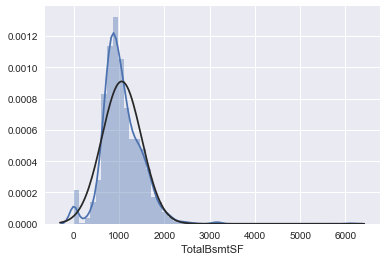

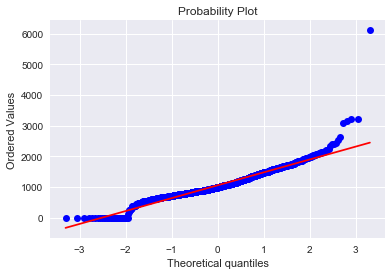

In [4]:
sns.distplot(dataset_train['TotalBsmtSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['TotalBsmtSF'], plot=plt)


/Users/petershi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


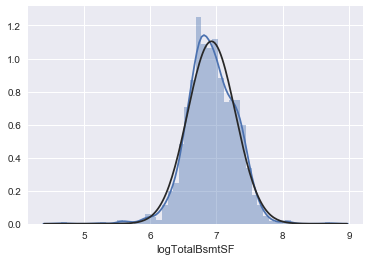

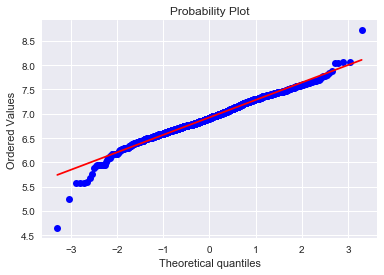

In [6]:
dataset_train['logTotalBsmtSF'] = 0 
dataset_train.loc[dataset_train['TotalBsmtSF']>0,'logTotalBsmtSF'] = np.log(dataset_train['TotalBsmtSF'])


sns.distplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], plot=plt)



Better now

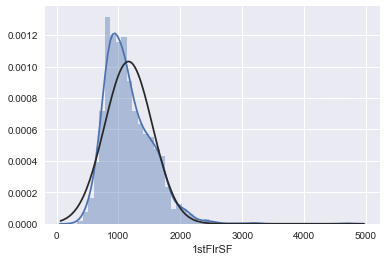

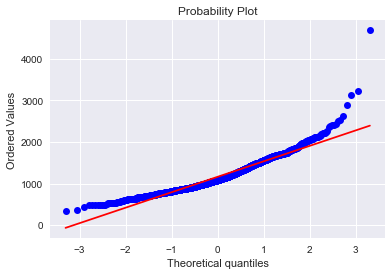

In [7]:
sns.distplot(dataset_train['1stFlrSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['1stFlrSF'], plot=plt)

Similar situation, applying log tranformation will do

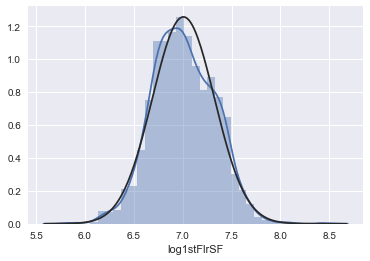

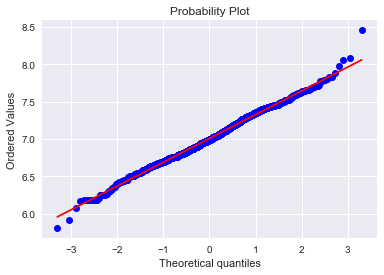

In [8]:
dataset_train['log1stFlrSF'] = np.log(dataset_train['1stFlrSF'])

sns.distplot(dataset_train['log1stFlrSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['log1stFlrSF'], plot=plt)

Four assumption of linear regression model 

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.


